In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### GAIA SQL
##### http://gea.esac.esa.int/archive/

SELECT TOP 5000  
source_id,ra,ra_error,dec,dec_error,  
pmra, pmra_error, pmdec, pmdec_error,  
parallax,parallax_error,phot_g_mean_mag,bp_rp,  
radial_velocity,radial_velocity_error,  
phot_variable_flag,teff_val,a_g_val  

FROM gaiadr2.gaia_source  

WHERE ABS(pmra) <= pmra_error AND pmra_error < .25  
	AND ABS(pmdec) <= pmdec_error AND pmdec_error < .25  
	AND ABS(parallax) <= parallax_error AND parallax_error < .5

In [109]:
data = pd.read_csv('1529620689101O-result.csv')

data_ra_dec_only = data[['source_id', 'ra', 'dec']]

np.savetxt(fname=r'text.txt', X=data_ra_dec_only,
           fmt=('%d', '%f', '%f'),
           header=r'source_id, ra, dec',
           comments='')

### SDSS Crossmatch
##### https://skyserver.sdss.org/dr12/en/tools/crossid/crossid.aspx
SELECT  
   p.objID, p.ra, p.dec, p.run, p.rerun, p.camcol, p.field,  
   dbo.fPhotoTypeN(p.type) as type,  
   p.modelMag_u, p.modelMag_g, p.modelMag_r, p.modelMag_i, p.modelMag_z,  
   s.z, s.sourceType  
FROM #upload u  
      JOIN #x x ON x.up_id = u.up_id  
      JOIN PhotoTag p ON p.objID = x.objID  
      JOIN SpecObjAll s ON p.objID = s.bestObjID  
ORDER by x.up_id  
  
With a search radius of .05 arcmin

In [210]:
sdss_data = pd.read_csv('Skyserver_CrossID6_22_2018 4_40_39 AM.csv', skiprows=1)
print 'Looks like we have {} objects!'.format(len(sdss_data))

Looks like we have 404 objects!


In [204]:
sdss_data['u-g'] = sdss_data['modelMag_u'] - sdss_data['modelMag_g']
sdss_data['g-r'] = sdss_data['modelMag_g'] - sdss_data['modelMag_r']
sdss_data['r-i'] = sdss_data['modelMag_r'] - sdss_data['modelMag_i']
sdss_data['i-z'] = sdss_data['modelMag_i'] - sdss_data['modelMag_z']

In [205]:
# There are too many QSO types. Let's consolidate them all.
sdss_data['sourceType'].iloc[[i for i, ival in enumerate(sdss_data['sourceType']) if 'QSO' in ival]] = 'QSO'

In [206]:
sdss_p_cat = sdss_data['type']
sdss_p_cat_encoded, sdss_p_categories = sdss_p_cat.factorize()
sdss_s_cat = sdss_data['sourceType']
sdss_s_cat_encoded, sdss_s_categories = sdss_s_cat.factorize()

In [207]:
sdss_data_colors = sdss_data[['u-g', 'g-r', 'r-i', 'i-z']]

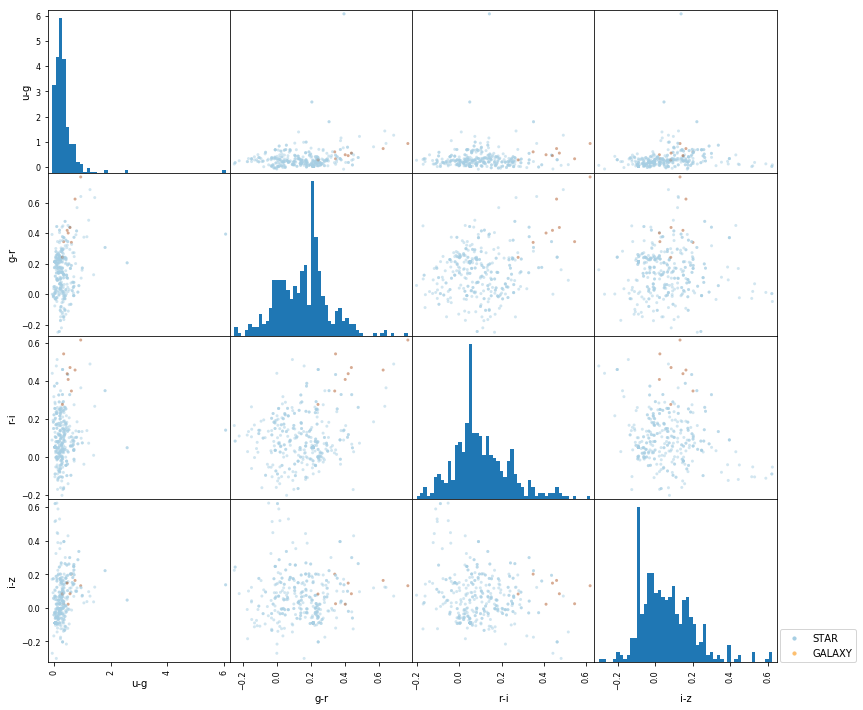

In [208]:
pd.plotting.scatter_matrix(sdss_data_colors,
                           hist_kwds={'bins':50},
                           c=sdss_p_cat_encoded,
                           cmap='Paired',
                           figsize=(15,12))

handles = [plt.plot([],[],
                    color=plt.cm.Paired(i/float(len(sdss_p_categories))),
                    ls="", marker="o",
                    markersize=np.sqrt(10))[0]
           for i in range(len(sdss_p_categories))]
labels=sdss_p_categories
plt.legend(handles, labels, loc=(1.02,0))

plt.savefig('colors_phot.png')
plt.show()

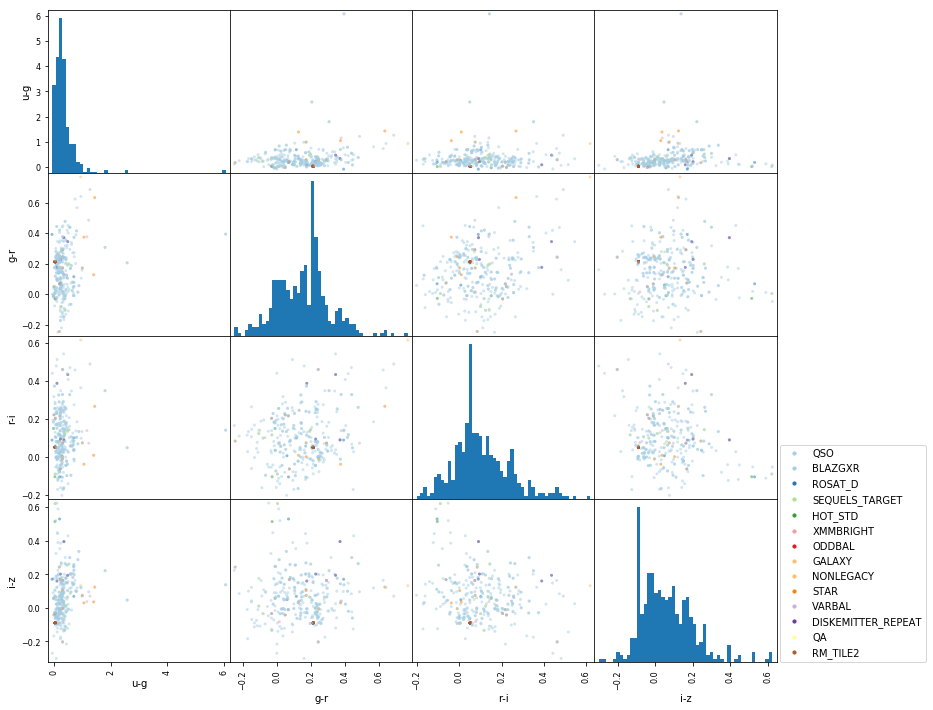

In [209]:
pd.plotting.scatter_matrix(sdss_data_colors,
                           hist_kwds={'bins':50},
                           c=sdss_s_cat_encoded,
                           cmap='Paired',
                           figsize=(15,12))

handles = [plt.plot([],[],
                    color=plt.cm.Paired(i/float(len(sdss_s_categories))),
                    ls="", marker="o",
                    markersize=np.sqrt(10))[0]
           for i in range(len(sdss_s_categories))]
labels=sdss_s_categories
plt.legend(handles, labels, loc=(1.02,0))

plt.savefig('colors_spec.png')
plt.show()